# Guided Project: Storytelling Data Visualization on Exchange Rates
## Trabalho 2 - Unidade 1 
Prof. Ivanovitch Silva

UFRN - 2021.2

## **Authors**

*   Kathleen Noemi Duarte Rego

*   Pedro Henrique de Souza Fonsêca dos Santos

## **Project Information**

The exchange rate between the euro and the American dollar

###Testing & Logging

In [8]:
%%file functions.py
import logging
import pandas as pd

logging.basicConfig(
    filename='./results.log',
    level=logging.INFO,
    filemode='w',
    format='%(name)s - %(levelname)s - %(message)s')

"""
Test file to be used to pytest
"""

def read_data(file_path):
    """
    Return the dataframe from a csv
    Args:
        file_path (str): Path of file than we will read.
    Return:
        df (pandas dataframe): Dataframe with the data of file.
    """
    try:
        df = pd.read_csv(file_path)
        logging.info("SUCCESS: There are {} rows in your dataframe".format(df.shape[0]))
        return df
    except:
        logging.error("ERROR: we were not able to find {}".format(file_path))

def calculate_rolling_mean(val, window):
    """
    Return the rolling mean calculated
    Args:
        val (pandas Series): Serie with the data than we will apply the rolling mean.
        window (int): Number of samples than we will use.
    Return:
        rolling_mean (pandas Series): Serie with the rolling mean.
    """
    try:
      assert(isinstance(window, int))
      rolling_mean = val.rolling(window).mean()
      logging.info("SUCCESS: The window value is INT".format(window))
      return rolling_mean
    except:
      logging.error("ERROR: Window is not a INT")

def to_datetime(time):
    """
    Return in datetime format
    Args:
        time (pandas Series): Serie with string dtype
    Return:
        date (pandas Series): Serie with datetime dtype
    """
    try:
      date = pd.to_datetime(time)
      logging.info("SUCCESS: Parsing was done")
      return date
    except:
      logging.error("Invalid parsing value")
      

Overwriting functions.py


In [9]:
%%file test_functions.py

import pandas as pd
from functions import read_data
from functions import calculate_rolling_mean
from functions import to_datetime

file_path_1 = 'https://github.com/pedrohfonseca/Guided-Project-Storytelling-Data-Visualization-on-Exchange-Rates/blob/main/databases/euro-daily-hist_1999_2021.csv?raw=true'
file_path_2 = 'https://github.com/pedrohfonseca/Guided-Project-Storytelling-Data-Visualization-on-Exchange-Rates/blob/main/databases/USD_BRL%20Dados%20Hist%C3%B3ricos.csv?raw=true'
file_path_3 = 'https://github.com/pedrohfonseca/Guided-Project-Storytelling-Data-Visualization-on-Exchange-Rates/blob/main/databases/USD_BRL%20Dados%20Hist%C3%B3ricos_2.csv?raw=true'

def test_read_data_1():
    assert(isinstance(read_data(file_path_1), pd.DataFrame))

def test_read_data_2():
    assert(isinstance(read_data(file_path_2), pd.DataFrame))

def test_read_data_3():
    assert(isinstance(read_data(file_path_3), pd.DataFrame))

def test_rolling_mean():
    assert(isinstance(calculate_rolling_mean(read_data('dados_resumo.csv')['US_dollar'], 2), pd.Series))

def test_to_datetime():
    assert(isinstance(to_datetime(read_data('dados_resumo.csv')['Time'][0]), pd.Timestamp))


Overwriting test_functions.py


In [ ]:
!pip -q install pytest pytest-sugar

In [10]:
!python -m pytest test_functions.py

============================= test session starts ==============================
platform linux -- Python 3.7.12, pytest-3.6.4, py-1.11.0, pluggy-0.7.1
rootdir: /content, inifile:
plugins: typeguard-2.7.1
collected 5 items                                                              

test_functions.py .....                                                  [100%]

=========================== 5 passed in 1.67 seconds ===========================


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
from functions import read_data
from functions import calculate_rolling_mean
from functions import to_datetime

### Reading the dataset

In [12]:
exchange_rates = read_data("""https://github.com/pedrohfonseca/Guided-Project-Storytelling-Data-Visualization-on-Exchange-Rates/blob/main/databases/euro-daily-hist_1999_2021.csv?raw=true""")

exchange_rates.head()

,Period\Unit:,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Algerian dinar ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Moroccan dirham ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],[US dollar ],[South African rand ]
0,2021-09-20,NaN,1.6201,1.9558,6.2495,1.5056,1.0883,7.5726,NaN,25.432,7.4359,NaN,NaN,0.85705,NaN,9.1188,7.5055,353.97,16742.86,3.7635,86.2720,152.0,128.18,1393.32,NaN,NaN,NaN,NaN,23.6419,4.9098,10.2430,1.6694,58.845,4.5997,4.9493,86.0700,10.2173,1.5839,NaN,NaN,39.0620,10.1512,NaN,1.1711,17.3301
1,2021-09-17,NaN,1.6111,1.9558,6.2039,1.4913,1.0931,7.6044,NaN,25.296,7.4360,NaN,NaN,0.85363,NaN,9.1691,7.5092,351.49,16762.90,3.7752,86.5335,151.4,129.61,1386.26,NaN,NaN,NaN,NaN,23.4722,4.9140,10.1208,1.6658,58.819,4.5804,4.9488,85.4338,10.1553,1.5851,NaN,NaN,39.1450,10.1323,NaN,1.1780,17.1891
2,2021-09-16,NaN,1.6077,1.9558,6.1611,1.4863,1.0886,7.5849,NaN,25.281,7.4360,NaN,NaN,0.85025,NaN,9.1575,7.5041,350.19,16766.34,3.7742,86.4730,151.2,128.67,1380.44,NaN,NaN,NaN,NaN,23.3728,4.8952,10.1293,1.6548,58.715,4.5763,4.9488,85.2347,10.1518,1.5805,NaN,NaN,38.9180,9.9663,NaN,1.1763,17.0544
3,2021-09-15,NaN,1.6153,1.9558,6.1979,1.5004,1.0845,7.6069,NaN,25.318,7.4361,NaN,NaN,0.85510,NaN,9.2021,7.4838,348.86,16826.33,3.7881,86.8625,151.2,129.11,1380.77,NaN,NaN,NaN,NaN,23.4927,4.9170,10.1418,1.6666,58.742,4.5501,4.9485,85.9738,10.1360,1.5860,NaN,NaN,38.8650,9.9769,NaN,1.1824,16.8973
4,2021-09-14,NaN,1.6114,1.9558,6.1788,1.4951,1.0887,7.6168,NaN,25.389,7.4361,NaN,NaN,0.85260,NaN,9.1899,7.4760,350.05,16857.27,3.7968,87.0370,151.2,130.08,1382.66,NaN,NaN,NaN,NaN,23.5067,4.9170,10.1745,1.6625,58.868,4.5542,4.9485,86.1062,10.1453,1.5870,NaN,NaN,38.9270,9.9848,NaN,1.1814,16.8097


In [13]:
exchange_rates.tail()

,Period\Unit:,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Algerian dinar ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Moroccan dirham ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],[US dollar ],[South African rand ]
5873,1999-01-08,NaN,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,NaN,15.6466,0.70940,324.00,9.0302,NaN,250.15,9321.63,NaN,NaN,80.99,130.09,1366.73,4.66430,0.6654,NaN,0.4419,11.4414,4.4295,8.5900,2.1557,44.295,4.0363,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,NaN,1.1659,6.7855
5874,1999-01-07,NaN,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,NaN,15.6466,0.70585,324.40,9.0131,NaN,250.09,9218.77,NaN,NaN,81.06,129.43,1337.16,4.65480,0.6627,NaN,0.4413,11.5511,4.4203,8.6295,2.1531,44.436,4.0165,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,NaN,1.1632,6.8283
5875,1999-01-06,NaN,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,NaN,15.6466,0.70760,324.72,9.1010,NaN,250.67,9337.68,NaN,NaN,81.54,131.42,1359.54,4.69940,0.6649,NaN,0.4420,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,NaN,1.1743,6.7307
5876,1999-01-05,NaN,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,NaN,15.6466,0.71220,324.70,9.1341,NaN,250.80,9314.51,NaN,NaN,81.53,130.96,1373.01,4.71740,0.6657,NaN,0.4432,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,NaN,1.1790,6.7975
5877,1999-01-04,NaN,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,NaN,15.6466,0.71110,327.15,9.1332,NaN,251.48,9433.61,NaN,NaN,81.48,133.73,1398.59,4.71700,0.6668,NaN,0.4432,11.6446,4.4798,8.8550,2.2229,45.510,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,NaN,1.1789,6.9358


In [14]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5878 non-null   object 
 1   [Argentine peso ]         5383 non-null   object 
 2   [Australian dollar ]      5878 non-null   object 
 3   [Bulgarian lev ]          5476 non-null   object 
 4   [Brazilian real ]         5610 non-null   object 
 5   [Canadian dollar ]        5878 non-null   object 
 6   [Swiss franc ]            5878 non-null   object 
 7   [Chinese yuan renminbi ]  5610 non-null   object 
 8   [Cypriot pound ]          2346 non-null   object 
 9   [Czech koruna ]           5878 non-null   object 
 10  [Danish krone ]           5878 non-null   object 
 11  [Algerian dinar ]         5383 non-null   object 
 12  [Estonian kroon ]         3130 non-null   object 
 13  [UK pound sterling ]      5878 non-null   object 
 14  [Greek d

### Data Cleaning

Our focus is compare the euro with the american dollar, so for this we go cleaning the data. Now we sort values by time.

In [15]:
exchange_rates.rename(columns={r'Period\Unit:': 'Time', '[US dollar ]': 'US_dollar'},
                      inplace=True)
exchange_rates['Time'] = to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', ascending=True, inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,Time,[Argentine peso ],[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],[Algerian dinar ],[Estonian kroon ],[UK pound sterling ],[Greek drachma ],[Hong Kong dollar ],[Croatian kuna ],[Hungarian forint ],[Indonesian rupiah ],[Israeli shekel ],[Indian rupee ],[Iceland krona ],[Japanese yen ],[Korean won ],[Lithuanian litas ],[Latvian lats ],[Moroccan dirham ],[Maltese lira ],[Mexican peso ],[Malaysian ringgit ],[Norwegian krone ],[New Zealand dollar ],[Philippine peso ],[Polish zloty ],[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[New Taiwan dollar ],US_dollar,[South African rand ]
0,1999-01-04,NaN,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,NaN,15.6466,0.71110,327.15,9.1332,NaN,251.48,9433.61,NaN,NaN,81.48,133.73,1398.59,4.71700,0.6668,NaN,0.4432,11.6446,4.4798,8.8550,2.2229,45.510,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,NaN,1.1789,6.9358
1,1999-01-05,NaN,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,NaN,15.6466,0.71220,324.70,9.1341,NaN,250.80,9314.51,NaN,NaN,81.53,130.96,1373.01,4.71740,0.6657,NaN,0.4432,11.5960,4.4805,8.7745,2.2011,44.745,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,NaN,1.1790,6.7975
2,1999-01-06,NaN,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,NaN,15.6466,0.70760,324.72,9.1010,NaN,250.67,9337.68,NaN,NaN,81.54,131.42,1359.54,4.69940,0.6649,NaN,0.4420,11.4705,4.4637,8.7335,2.1890,44.872,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,NaN,1.1743,6.7307
3,1999-01-07,NaN,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,NaN,15.6466,0.70585,324.40,9.0131,NaN,250.09,9218.77,NaN,NaN,81.06,129.43,1337.16,4.65480,0.6627,NaN,0.4413,11.5511,4.4203,8.6295,2.1531,44.436,4.0165,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,NaN,1.1632,6.8283
4,1999-01-08,NaN,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,NaN,15.6466,0.70940,324.00,9.0302,NaN,250.15,9321.63,NaN,NaN,80.99,130.09,1366.73,4.66430,0.6654,NaN,0.4419,11.4414,4.4295,8.5900,2.1557,44.295,4.0363,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,NaN,1.1659,6.7855


In [16]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.0867     6
          ..
0.9061     1
1.1597     1
0.8535     1
1.3116     1
0.9014     1
Name: US_dollar, Length: 3576, dtype: int64

In [17]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5816 entries, 0 to 5877
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5816 non-null   datetime64[ns]
 1   US_dollar  5816 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 136.3 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Rolling Mean

After finish data cleaning, we wil generate a line plot.

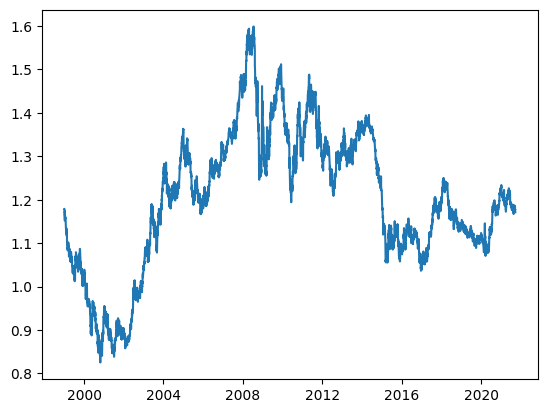

In [18]:
style.use('default')
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

If we look to line, we see many small wiggles. They are the visual representation of the daily variation and do not matters to us in our analyze right now. We will use the rolling mean to remove the wiggles.

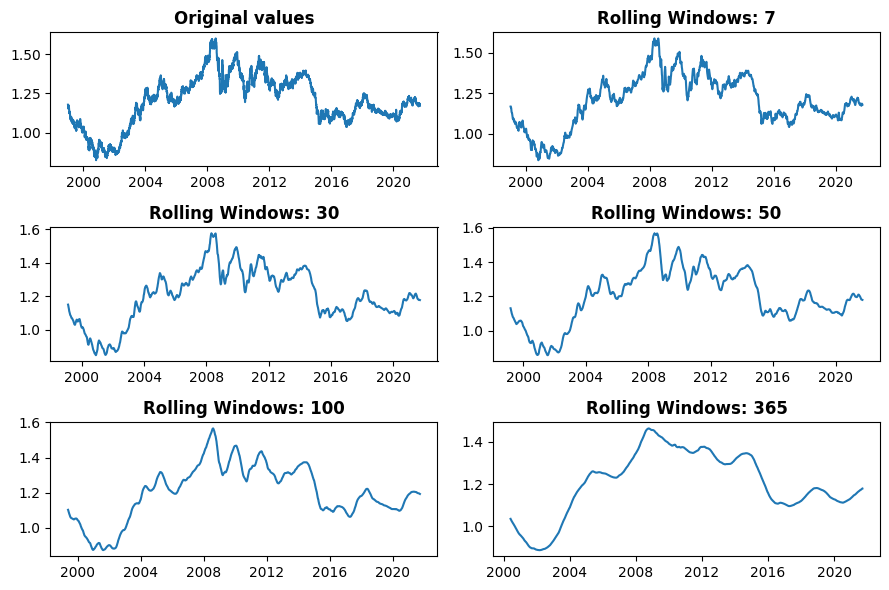

In [19]:
fig, ax = plt.subplots(figsize=(9,6))

plt.subplot(3, 2, 1)
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3, 2, i)
    plt.plot(euro_to_dollar['Time'], calculate_rolling_mean(
        euro_to_dollar['US_dollar'], rolling_mean))
    plt.title('Rolling Windows: ' + str(rolling_mean),
              weight='bold')
plt.tight_layout()
plt.show()

We will choose rolling mean equals 30.

In [20]:
euro_to_dollar['rolling_mean'] = calculate_rolling_mean(
    euro_to_dollar['US_dollar'],30)
euro_to_dollar.tail()

,Time,US_dollar,rolling_mean
5873,2021-09-14,1.1814,1.178560
5874,2021-09-15,1.1824,1.178437
5875,2021-09-16,1.1763,1.178147
5876,2021-09-17,1.1780,1.178057
5877,2021-09-20,1.1711,1.177890


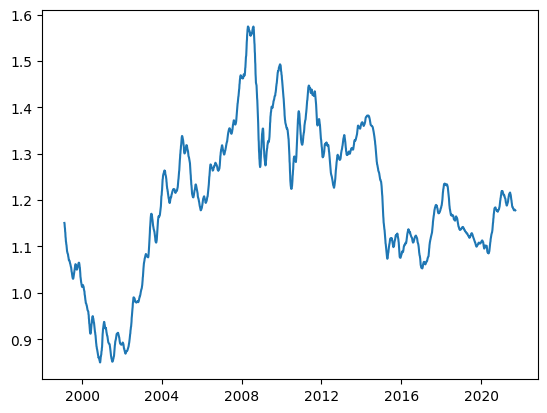

In [21]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean'])
plt.show()

### Coming up with an Idea

For do this graph, we have 3 ideas. The most important is to create a story using the data. So, this is the 3 ideas:
*   We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.
*   We show comparatively how the euro-dollar rate changed under the last four US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), Donald Trump (2017-2021) and Joe Biden (2021)). We can use a line plot.
*   We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.

### Storytelling Data Visualization Examples

#### Financial Crisis

In [22]:
financial_crisis = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2006)
                                         & (euro_to_dollar['Time'].dt.year < 2010)]
financial_crisis_07_08 = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2007)
                                                & (euro_to_dollar['Time'].dt.year <= 2008)]

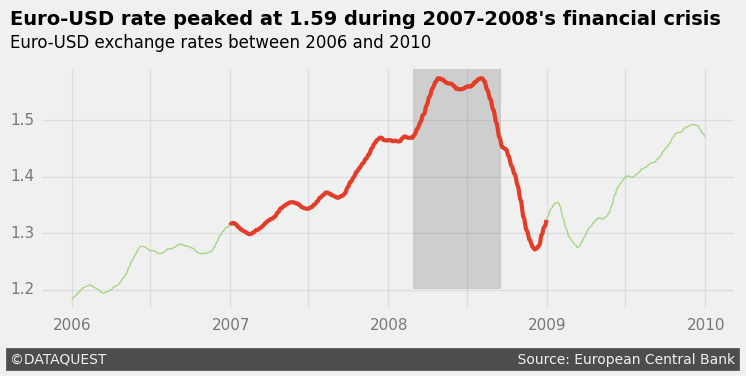

In [23]:
# Adding the FiveThirtyEight style
style.use('fivethirtyeight')

# Ploting the graphs with the rolling mean of financial crisis
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis['Time'], 
        financial_crisis['rolling_mean'],
        linewidth=1, color='#A6D785')
ax.plot(financial_crisis_07_08['Time'], 
        financial_crisis_07_08['rolling_mean'],
        linewidth=3, color='#e23d28')

# Removing the labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# Evidencing the peak of crisis
ax.axvspan(xmin=733100.0, xmax=733300.0, ymin=0.09,
           alpha=0.3, color='grey')

# Adding the x-label
x = 732270.0
y = 1.13
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, y, s=year, alpha=0.5, fontsize=11)
    x += 365

# Adding the y-label
x = 732170.0
y = 1.193
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(x, y, s=rate, alpha=0.5, fontsize=11)
    y += 0.1

# Adding the title and subtitle
ax.text(732170.0, 1.67, s="Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold')
ax.text(732170.0, 1.63, s="Euro-USD exchange rates between 2006 and 2010",
        size=12)

# Adding a signature
ax.text(732170.0, 1.07, s='©DATAQUEST' + ' '*94 + 'Source: European Central Bank',
        color='#f0f0f0', backgroundcolor = '#4d4d4d', size=10)

# Change grid transparency
ax.grid(alpha=0.5)
plt.savefig('financial_crisis.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

#### The USA presidents

In [24]:
bush_obama_trump_biden = euro_to_dollar.copy()[euro_to_dollar['Time'].dt.year >= 2001]

bush = bush_obama_trump_biden.copy()[bush_obama_trump_biden['Time'].dt.year < 2009]
obama = bush_obama_trump_biden.copy()[(bush_obama_trump_biden['Time'].dt.year >= 2009)
                                & (bush_obama_trump_biden['Time'].dt.year < 2017)]
trump = bush_obama_trump_biden.copy()[(bush_obama_trump_biden['Time'].dt.year >= 2017)
                                & (bush_obama_trump_biden['Time'].dt.year < 2021)]
biden = bush_obama_trump_biden.copy()[bush_obama_trump_biden['Time'].dt.year >= 2021]

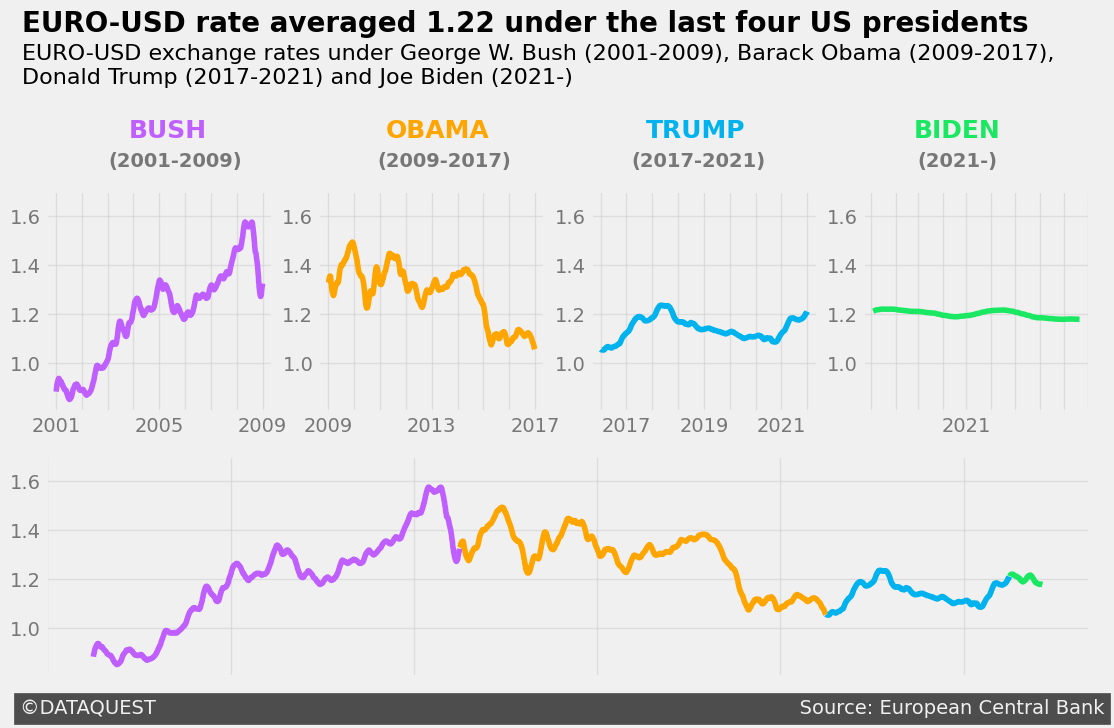

In [25]:
# Adding the FiveThirtyEight style
style.use('fivethirtyeight')

# Adding subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2, 4, 1)
ax2 = plt.subplot(2, 4, 2)
ax3 = plt.subplot(2, 4, 3)
ax4 = plt.subplot(2, 4, 4)
ax5 = plt.subplot(2, 1, 2)
axes = [ax1, ax2, ax3, ax4, ax5]

for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6'], alpha=0.5)
    ax.grid(alpha=0.5)

# Bush graph
ax1.plot(bush['Time'], bush['rolling_mean'],
         color='#BF5FFF')
ax1.set_xticklabels(['', '2001', '', '', '',  '2005', '', '', '', '2009'],
                    alpha=0.5)
ax1.text(731520.0, 1.92, s='BUSH', weight='bold',
        color='#BF5FFF', fontsize=18)
ax1.text(731220.0, 1.8, s='(2001-2009)', weight='bold',
         alpha=0.5)

# Obama graph
ax2.plot(obama['Time'], obama['rolling_mean'],
         color='#ffa500')
ax2.set_xticklabels(['', '2009', '', '', '', '2013', '', '', '', '2017'],
                    alpha=0.5)
ax2.text(734220.0, 1.92, s='OBAMA', weight='bold',
        color='#ffa500', fontsize=18)
ax2.text(734100.0, 1.8, s='(2009-2017)', weight='bold',
         alpha=0.5)

# Trump graph
ax3.plot(trump['Time'], trump['rolling_mean'],
         color='#00B2EE')
ax3.set_xticklabels(['', '2017', '', '', '2019', '', '', '2021'],
                    alpha=0.5)
ax3.text(736650.0, 1.92, s='TRUMP', weight='bold',
        color='#00B2EE', fontsize=18)
ax3.text(736550.0, 1.8, s='(2017-2021)', weight='bold',
         alpha=0.5)

# Biden graph
ax4.plot(biden['Time'], biden['rolling_mean'],
         color='#1AE862')
ax4.set_xticklabels(['', '', '', '', '2021'],
                    alpha=0.5)
ax4.text(737845.0, 1.92, s='BIDEN', weight='bold',
        color='#1AE862', fontsize=18)
ax4.text(737850.0, 1.8, s='(2021-)', weight='bold',
         alpha=0.5)

# Bush-Obama-Trump-Biden graph
ax5.plot(bush['Time'], bush['rolling_mean'],
         color='#BF5FFF')
ax5.plot(obama['Time'], obama['rolling_mean'],
         color='#ffa500')
ax5.plot(trump['Time'], trump['rolling_mean'],
         color='#00B2EE')
ax5.plot(biden['Time'], biden['rolling_mean'],
         color='#1AE862')
ax5.grid(alpha=0.5)
ax5.set_xticklabels([])

# Adding a title and subtitle
ax1.text(730000.0, 2.35, s='EURO-USD rate averaged 1.22 under the last four US presidents',
         weight='bold', fontsize=20)
ax1.text(730000.0, 2.14, s='''EURO-USD exchange rates under George W. Bush (2001-2009), Barack Obama (2009-2017),
Donald Trump (2017-2021) and Joe Biden (2021-)''', fontsize=16)

# Adding a signature
ax5.text(729900.0, 0.65, s='©DATAQUEST' + ' '*103 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)
plt.savefig('euro-usd-rate.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

#### Historic datas about BRL vs. USD

Now, we will compare the exchange between BRL and USD, considering all presidents and some historic facts, beyond the pandemic.

In [26]:
exchange_real_1 = read_data('https://github.com/pedrohfonseca/Guided-Project-Storytelling-Data-Visualization-on-Exchange-Rates/blob/main/databases/USD_BRL%20Dados%20Hist%C3%B3ricos.csv?raw=true')
exchange_real_2 = read_data('https://github.com/pedrohfonseca/Guided-Project-Storytelling-Data-Visualization-on-Exchange-Rates/blob/main/databases/USD_BRL%20Dados%20Hist%C3%B3ricos_2.csv?raw=true')
exchange_real = pd.merge(exchange_real_1, exchange_real_2, how='outer')
exchange_real.head()

,Data,Último,Abertura,Máxima,Mínima,Var%
0,13.03.2014,"2,3641","2,3550","2,3677","2,3371","0,49%"
1,12.03.2014,"2,3525","2,3632","2,3739","2,3525","-0,49%"
2,11.03.2014,"2,3642","2,3493","2,3687","2,3376","0,61%"
3,10.03.2014,"2,3498","2,3459","2,3567","2,3265","0,39%"
4,07.03.2014,"2,3406","2,3232","2,3498","2,3217","0,75%"


In [27]:
exchange_real.tail()

,Data,Último,Abertura,Máxima,Mínima,Var%
6996,20.03.2014,"2,3281","2,3485","2,3584","2,3207","-0,84%"
6997,19.03.2014,"2,3478","2,3348","2,3538","2,3249","0,58%"
6998,18.03.2014,"2,3342","2,3488","2,3598","2,3327","-0,65%"
6999,17.03.2014,"2,3495","2,3477","2,3575","2,3425","0,13%"
7000,14.03.2014,"2,3465","2,3640","2,3766","2,3455","-0,74%"


In [28]:
exchange_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7001 entries, 0 to 7000
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      7001 non-null   object
 1   Último    7001 non-null   object
 2   Abertura  7001 non-null   object
 3   Máxima    7001 non-null   object
 4   Mínima    7001 non-null   object
 5   Var%      7001 non-null   object
dtypes: object(6)
memory usage: 382.9+ KB


#### Data cleaning

Again.
We will use the 'Máxima' column, that's show the maximum value during the day. We will transform the 'Data' column to datetime and the 'Máxima' column to float.

In [29]:
exchange_real.rename(columns={r'Data': 'Time'}, inplace=True)
exchange_real['Time'] = to_datetime(exchange_real['Time'])
exchange_real.sort_values('Time', ascending=True, inplace=True)
exchange_real.reset_index(drop=True, inplace=True)
exchange_real.head()

,Time,Último,Abertura,Máxima,Mínima,Var%
0,1995-01-02,"0,8405","0,8405","0,8435","0,8395","0,00%"
1,1995-01-03,"0,8505","0,8505","0,8505","0,8455","0,00%"
2,1995-01-05,"0,9165","0,9185","0,9185","0,9165","-0,11%"
3,1995-01-06,"0,9065","0,9055","0,9075","0,9015","0,11%"
4,1995-01-08,"0,9351","0,9346","0,9355","0,9346","0,00%"


In [30]:
dollar_to_real = exchange_real[['Time', 'Máxima']].copy()
dollar_to_real.rename(columns={r'Máxima': 'brl_value'}, inplace=True)
dollar_to_real['brl_value'].value_counts()

1,7760    8
1,9610    7
0,9075    7
1,8250    6
1,8230    6
         ..
2,2700    1
1,7317    1
2,4633    1
3,2665    1
0,9669    1
Name: brl_value, Length: 5523, dtype: int64

In [31]:
dollar_to_real['brl_value'] = dollar_to_real['brl_value'].str.replace(',','.')
dollar_to_real['brl_value'] = dollar_to_real['brl_value'].astype(float)
dollar_to_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       7001 non-null   datetime64[ns]
 1   brl_value  7001 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 109.5 KB


Now, applying the rolling mean again.

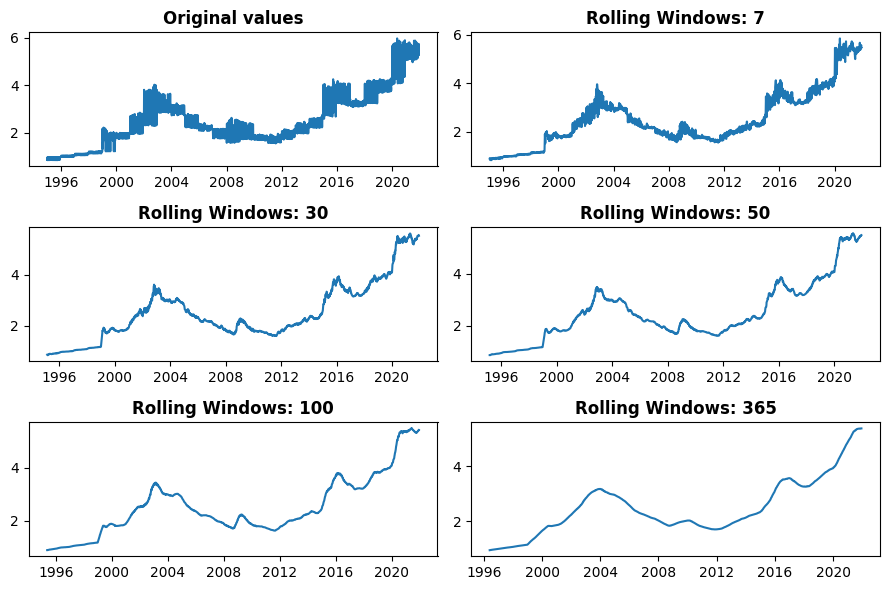

In [32]:
style.use('default')

fig, ax = plt.subplots(figsize=(9,6))

plt.subplot(3, 2, 1)
plt.plot(dollar_to_real['Time'],
         dollar_to_real['brl_value'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3, 2, i)
    plt.plot(dollar_to_real['Time'], calculate_rolling_mean(
        dollar_to_real['brl_value'],rolling_mean))
    plt.title('Rolling Windows: ' + str(rolling_mean),
              weight='bold')
plt.tight_layout()
plt.show()

We will choose 50 values to rolling mean.

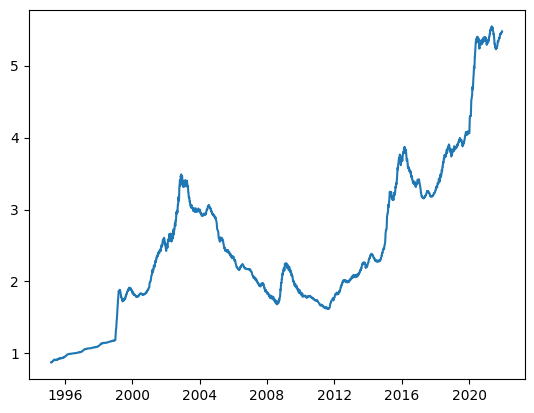

In [33]:
dollar_to_real['rolling_mean'] = calculate_rolling_mean(
    dollar_to_real['brl_value'],50)
plt.plot(dollar_to_real['Time'], dollar_to_real['rolling_mean'])


####Brazilian presidents

In [38]:
fhc = dollar_to_real.copy()[dollar_to_real['Time'].dt.year < 2003]
lula = dollar_to_real.copy()[(dollar_to_real['Time'].dt.year >= 2003)
                             & (dollar_to_real['Time'].dt.year < 2011)]
dilma = dollar_to_real.copy()[(dollar_to_real['Time'].dt.year >= 2011)
                             & (dollar_to_real['Time'].dt.year < 2017)
                             & (dollar_to_real['Time'].dt.month < 9)
                             & (dollar_to_real['Time'].dt.day <= 31)]
temer = dollar_to_real.copy()[(dollar_to_real['Time'].dt.year >= 2016)
                             & (dollar_to_real['Time'].dt.month >= 9)
                             & (dollar_to_real['Time'].dt.day >= 1)
                             & (dollar_to_real['Time'].dt.year < 2019)]
bolso = dollar_to_real.copy()[dollar_to_real['Time'].dt.year >= 2019]
covid = dollar_to_real.copy()[(dollar_to_real['Time'].dt.year >= 2020)
                            & (dollar_to_real['Time'].dt.month >= 3)
                            & (dollar_to_real['Time'].dt.day >= 1)]

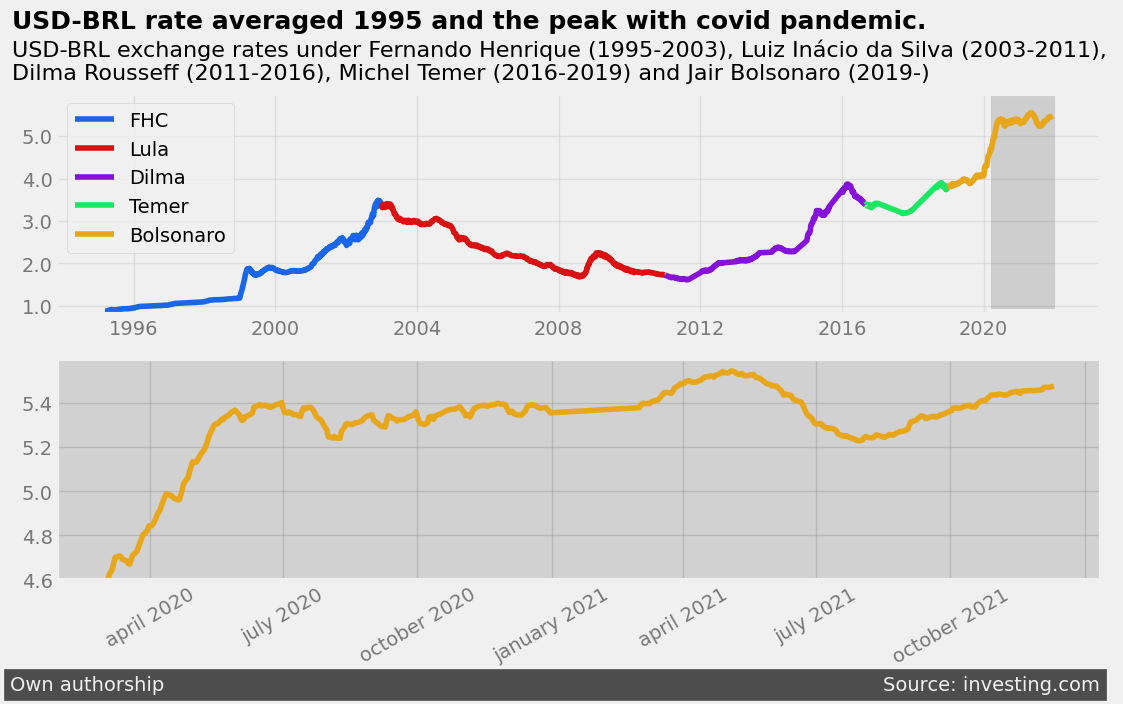

In [39]:
# Adding the FiveThirtyEight style
style.use('fivethirtyeight')

# Adding subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

# Graph
ax1.plot(fhc['Time'], fhc['rolling_mean'],
         color='#1a66e8')
ax1.plot(lula['Time'], lula['rolling_mean'],
         color='#d91111')
ax1.plot(dilma['Time'], dilma['rolling_mean'],
         color='#8611d9')
ax1.plot(temer['Time'], temer['rolling_mean'],
         color='#1AE862')
ax1.plot(bolso['Time'], bolso['rolling_mean'],
         color='#e8a71a')
ax1.grid(alpha=0.5)
ax1.set_xticklabels([])
ax1.set_xticklabels(['', '1996', '2000',  '2004', '2008', '2012', '2016', '2020'],
                    alpha=0.5)

ax1.set_ylim(0.8, 6)
ax1.set_yticks([1.0, 2.0, 3.0, 4.0, 5.0])
ax1.set_yticklabels(['1.0', '2.0', '3.0', '4.0', '5.0'], alpha=0.5)
ax1.grid(alpha=0.5)
ax1.legend(['FHC', 'Lula', 'Dilma', 'Temer', 'Bolsonaro'])

ax1.axvspan(xmin=737500.0, xmax=738150.0, ymin=0.03,
           alpha=0.3, color='grey')

ax2.set_facecolor("#d1d1d1") 
ax2.plot(covid['Time'], covid['rolling_mean'],
         color='#e8a71a')
ax2.set_xticklabels([])
ax2.set_xticklabels(['april 2020', 'july 2020',  'october 2020', 'january 2021',
                     'april 2021', 'july 2021', 'october 2021'],
                     alpha=0.5, rotation=30)
ax2.set_ylim(4.6, 5.6)
ax2.set_yticks([4.6, 4.8, 5.0, 5.2, 5.4])
ax2.set_yticklabels(['4.6', '4.8', '5.0', '5.2', '5.4'], alpha=0.5)
ax2.grid(color='grey', alpha=0.3)

# Adding a title and subtitle
ax1.text(727400.0, 7.54, s='USD-BRL rate averaged 1995 and the peak with covid pandemic.',
         weight='bold', fontsize=18)
ax1.text(727400.0, 6.34, s='''USD-BRL exchange rates under Fernando Henrique (1995-2003), Luiz Inácio da Silva (2003-2011), 
Dilma Rousseff (2011-2016), Michel Temer (2016-2019) and Jair Bolsonaro (2019-)''', fontsize=16)

# Adding a signature
ax2.text(737420.0, 4.1, s='Own authorship' + ' '*115 + 'Source: investing.com',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=14)
plt.savefig('usd-brl-rate.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()
